# Предварительный анализ данных Hi-C

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [2]:
%%bash
pip install cooler
pip install hicrep


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 4.5 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 39.5 MB/s eta 0

In [7]:
import matplotlib.pyplot as plt

In [8]:
import cooler

In [9]:
import numpy as np

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

We have replicates for 2 drosophila cell lines: Bg3 and Kc167.

Bg3 - nervous cell line (HiC1...., HiC2... files)

Kc167 - embryonic cell line (HiC3...., HiC4... files)

### Считываем .mcool файлы в объекты cooler

In [5]:
mcool_1 ='/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool'
mcool_2 ='/content/drive/MyDrive/hic/HiC2.dm3.mapq_30.1000.mcool'
mcool_3 ='/content/drive/MyDrive/hic/HiC3.dm3.mapq_30.1000.mcool'
mcool_4 ='/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool'

In [76]:
resolution = 10000
clr_1 = cooler.Cooler(f'{mcool_1}::resolutions/{resolution}')
clr_2 = cooler.Cooler(f'{mcool_2}::resolutions/{resolution}')
clr_3 = cooler.Cooler(f'{mcool_3}::resolutions/{resolution}')
clr_4 = cooler.Cooler(f'{mcool_4}::resolutions/{resolution}')

### Получили информацию и атрибуты матрицы Hi-C с помощью cooler.info (для 1 реплики)

In [77]:
clr_1.info

{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:38:39.059783',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 12044,
 'nchroms': 7,
 'nnz': 11146004,
 'storage-mode': 'symmetric-upper',
 'sum': 63912926}

### Открыли объект как сбалансированныую матрицу

In [78]:
m_1=clr_1.matrix(balance=True).fetch('chrX')
m_2=clr_2.matrix(balance=True).fetch('chrX')
m_3=clr_3.matrix(balance=True).fetch('chrX')
m_4=clr_4.matrix(balance=True).fetch('chrX')


In [79]:
m_1

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 0.89857834, ...,        nan, 0.        ,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 0.        , ...,        nan, 1.95029858,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

### Таблица с координатами и контактами

In [80]:
pix = clr_1.pixels(join=True)[:]
pix

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,10000,chr2L,0,10000,1605
1,chr2L,0,10000,chr2L,10000,20000,281
2,chr2L,0,10000,chr2L,20000,30000,87
3,chr2L,0,10000,chr2L,30000,40000,45
4,chr2L,0,10000,chr2L,40000,50000,27
...,...,...,...,...,...,...,...
11145999,chrX,22410000,22420000,chrX,22410000,22420000,1225
11146000,chrX,22410000,22420000,chrX,22420000,22422827,21
11146001,chrX,22420000,22422827,chrX,22420000,22422827,244
11146002,chrM,0,10000,chrM,0,10000,68


### Таблица с бинами

In [81]:
clr_1.pixels()[:]

,bin1_id,bin2_id,count
0,0,0,1605
1,0,1,281
2,0,2,87
3,0,3,45
4,0,4,27
...,...,...,...
11145999,12040,12040,1225
11146000,12040,12041,21
11146001,12041,12041,244
11146002,12042,12042,68


### Получили таблицу в командной строке командой *cooler dump*

In [83]:
!cooler dump --header '/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/10000' > dump_pix
!head dump_pix

bin1_id	bin2_id	count
0	0	1605
0	1	281
0	2	87
0	3	45
0	4	27
0	5	31
0	6	37
0	7	18
0	8	15


таблица с бинами в которой отмечены начало и конец бинов и сила границы в поле weight

In [84]:
!cooler dump --header --table=bins '/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/10000' > dump_bins
!head dump_bins

chrom	start	end	weight
chr2L	0	10000	0.0302177
chr2L	10000	20000	0.0174656
chr2L	20000	30000	0.0147097
chr2L	30000	40000	0.0171483
chr2L	40000	50000	0.0228932
chr2L	50000	60000	0.0197325
chr2L	60000	70000	0.0136326
chr2L	70000	80000	0.0153006
chr2L	80000	90000	0.0144679


### Строим кривые зависимости числа контактов от расстояний для хромосомы **chrX** (в логарифмических-координатах) для 4х реплик.

In [85]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z_1=np.zeros(len(m_1))
for i in range(len(m_1)):
  z_1[i]=np.nanmean(np.diagonal(m_1,i))

<ipython-input-85-f0340d81560e>:4: RuntimeWarning: Mean of empty slice
  z_1[i]=np.nanmean(np.diagonal(m_1,i))


<ipython-input-86-0559feb4ffcf>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_1))*10000,np.log(z_1))


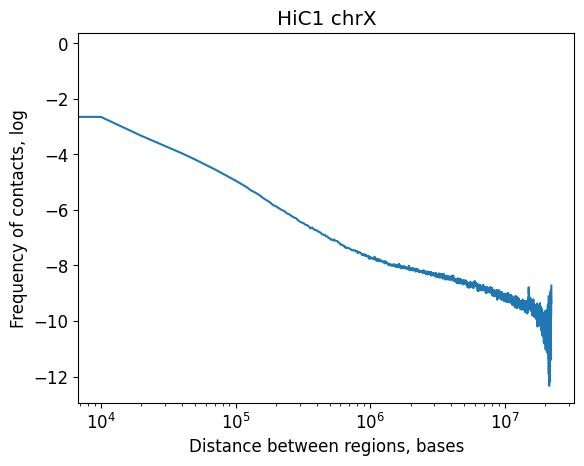

In [86]:
##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 10000, так как ранее использовали разрешение 10000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_1))*10000,np.log(z_1))
plt.title('HiC1 chrX')
plt.xlabel('Distance between regions, bases')
plt.ylabel('Frequency of contacts, log')
plt.xscale('log')

In [88]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z_2=np.zeros(len(m_2))
for i in range(len(m_2)):
  z_2[i]=np.nanmean(np.diagonal(m_2,i))

<ipython-input-88-92102246713a>:4: RuntimeWarning: Mean of empty slice
  z_2[i]=np.nanmean(np.diagonal(m_2,i))


<ipython-input-89-2a316e197b15>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_2))*10000,np.log(z_2))


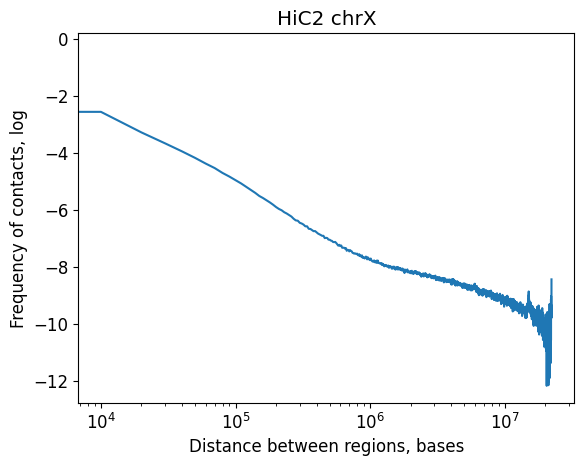

In [89]:
##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 10000, так как ранее использовали разрешение 10000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_2))*10000,np.log(z_2))
plt.title('HiC2 chrX')
plt.xlabel('Distance between regions, bases')
plt.ylabel('Frequency of contacts, log')
plt.xscale('log')

<ipython-input-90-2bf2eda953eb>:4: RuntimeWarning: Mean of empty slice
  z_3[i]=np.nanmean(np.diagonal(m_3,i))
<ipython-input-90-2bf2eda953eb>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_3))*10000,np.log(z_3))


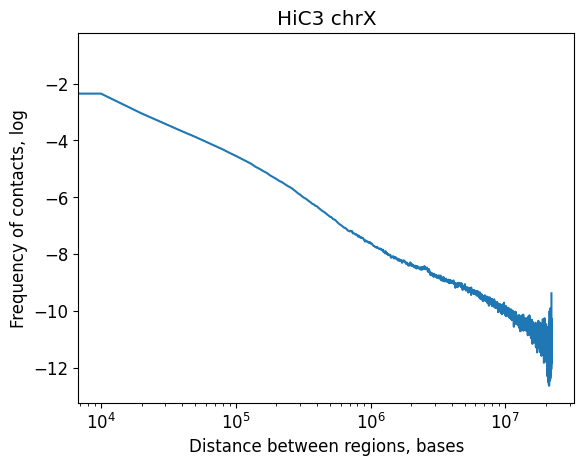

In [90]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z_3=np.zeros(len(m_3))
for i in range(len(m_3)):
  z_3[i]=np.nanmean(np.diagonal(m_3,i))

##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 10000, так как ранее использовали разрешение 10000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_3))*10000,np.log(z_3))
plt.title('HiC3 chrX')
plt.xlabel('Distance between regions, bases')
plt.ylabel('Frequency of contacts, log')
plt.xscale('log')

<ipython-input-91-0bb15a3c422b>:4: RuntimeWarning: Mean of empty slice
  z_4[i]=np.nanmean(np.diagonal(m_4,i))
<ipython-input-91-0bb15a3c422b>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_4))*10000,np.log(z_4))


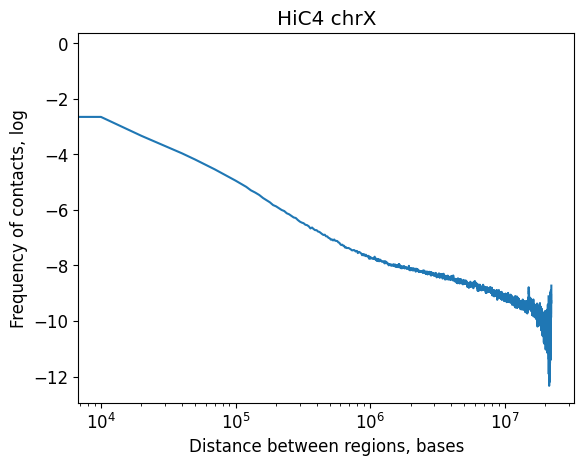

In [91]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z_4=np.zeros(len(m_4))
for i in range(len(m_4)):
  z_4[i]=np.nanmean(np.diagonal(m_4,i))

##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 10000, так как ранее использовали разрешение 10000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_4))*10000,np.log(z_4))
plt.title('HiC4 chrX')
plt.xlabel('Distance between regions, bases')
plt.ylabel('Frequency of contacts, log')
plt.xscale('log')

Судя по графикам можно сделать вывод о том, что расположенные ближе области хроматина взаимодействуют между собой чаще отдаленных, т.е. корреляцию между дистанцией и логарифмом частоты взаимодействия можно аппроксимировать линейно.

### Находим insulation score и границы тадов для всех реплик

Был выбран участок chrX от 3000000 до 4500000

In [33]:
!pip install cooltools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-3.0.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.4 MB/s eta 0:00:00
Using cached Cython-3.0.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 44.3 

In [1]:
import cooltools
from cooltools import insulation

In [92]:
resolution = 10000
start = 3_000_000
end = 4_500_000

In [93]:
windows = [3*resolution,5*resolution, 10*resolution]
insulation_table = insulation(clr_1, windows, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM


In [94]:
insulation_table

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
0,chr2L,0,10000,chr2L,False,0.273152,1.0,0.332911,3.0,0.618747,8.0,NaN,NaN,NaN,False,False,False
1,chr2L,10000,20000,chr2L,False,0.072146,3.0,0.301227,7.0,0.567368,17.0,NaN,NaN,NaN,False,False,False
2,chr2L,20000,30000,chr2L,False,0.242245,6.0,0.646625,12.0,0.801080,27.0,NaN,NaN,NaN,False,False,False
3,chr2L,30000,40000,chr2L,False,0.748422,6.0,0.582777,17.0,0.723293,37.0,NaN,NaN,NaN,False,False,False
4,chr2L,40000,50000,chr2L,False,0.916235,6.0,0.371356,22.0,0.523749,47.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,chrX,22400000,22410000,chrX,True,0.621518,2.0,0.855019,3.0,1.191197,6.0,NaN,NaN,NaN,False,False,False
12040,chrX,22410000,22420000,chrX,False,0.757195,1.0,1.208406,2.0,1.341588,5.0,NaN,NaN,NaN,False,False,False
12041,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
12042,chrM,0,10000,chrM,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


Записали часть таблицы по соответствующей хромосоме и участку для 4 реплик

In [96]:
insulation_tables = [0,1,2,3] #солидный костыль
clr_arr = [clr_1, clr_2, clr_3, clr_4]

windows = [3*resolution,5*resolution, 10*resolution]
for i in range(0,4):
  insulation_table = insulation(clr_arr[i], windows, verbose=True)
  insulation_tables[i] = insulation_table[insulation_table['chrom'] == 'chrX']
  insulation_tables[i] = insulation_tables[i][insulation_tables[i]['start'] > start]
  insulation_tables[i] = insulation_tables[i][insulation_tables[i]['end'] < end]


INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Pro

In [98]:
insulation_tables[3]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
10100,chrX,3010000,3020000,chrX,False,0.006185,6.0,-0.084810,22.0,-0.069457,97.0,NaN,0.153918,NaN,False,False,False
10101,chrX,3020000,3030000,chrX,False,-0.039540,6.0,-0.069254,22.0,-0.092421,87.0,0.264180,NaN,NaN,False,False,False
10102,chrX,3030000,3040000,chrX,False,0.318115,6.0,0.009835,22.0,-0.138244,87.0,NaN,NaN,0.003559,False,False,False
10103,chrX,3040000,3050000,chrX,False,0.550048,6.0,0.069108,22.0,-0.134686,87.0,NaN,NaN,NaN,False,False,False
10104,chrX,3050000,3060000,chrX,False,0.325755,6.0,0.027046,22.0,-0.143328,87.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,chrX,4440000,4450000,chrX,False,-0.488246,6.0,-0.464990,22.0,-0.050169,97.0,NaN,NaN,NaN,False,False,False
10244,chrX,4450000,4460000,chrX,False,-0.222987,6.0,-0.048083,22.0,0.166942,97.0,NaN,NaN,NaN,False,False,False
10245,chrX,4460000,4470000,chrX,False,0.339655,6.0,0.259765,22.0,0.284278,97.0,NaN,NaN,NaN,False,False,False
10246,chrX,4470000,4480000,chrX,False,0.641703,6.0,0.564965,22.0,0.375550,97.0,NaN,NaN,NaN,False,False,False


In [68]:
import cooler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
import cooltools.lib.plotting

In [99]:
import numpy as np

def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


(3000000.0, 4500000.0)

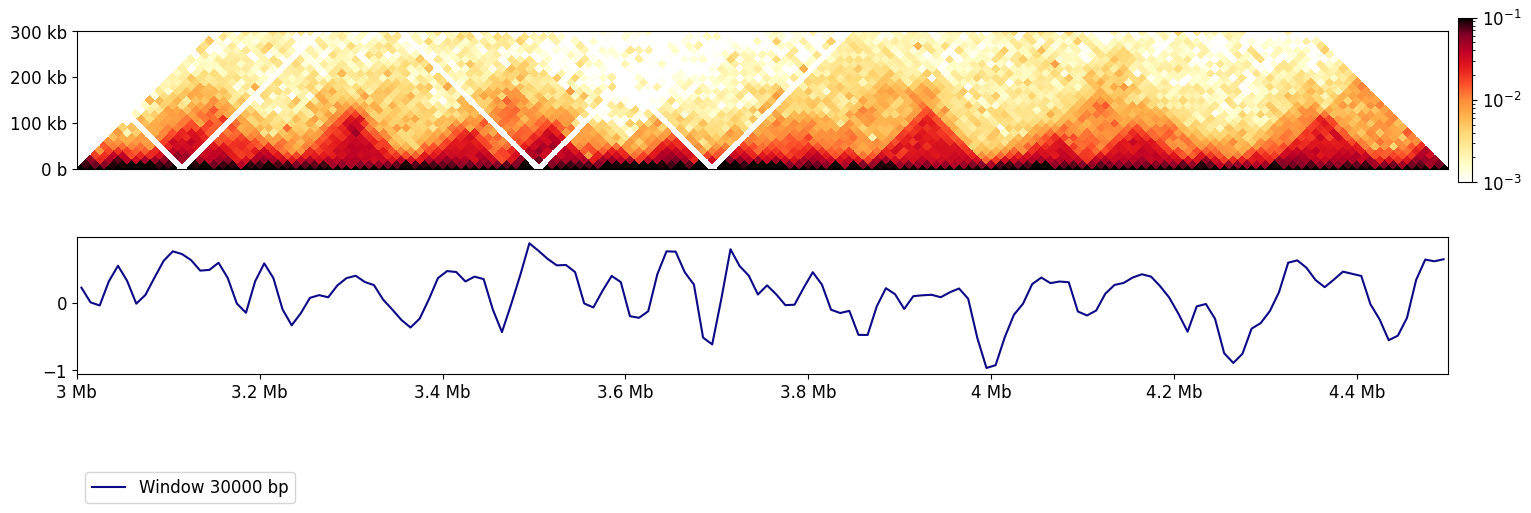

In [106]:
##HIC1
plt.rcParams['font.size'] = 12

region = ('chrX', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_1.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

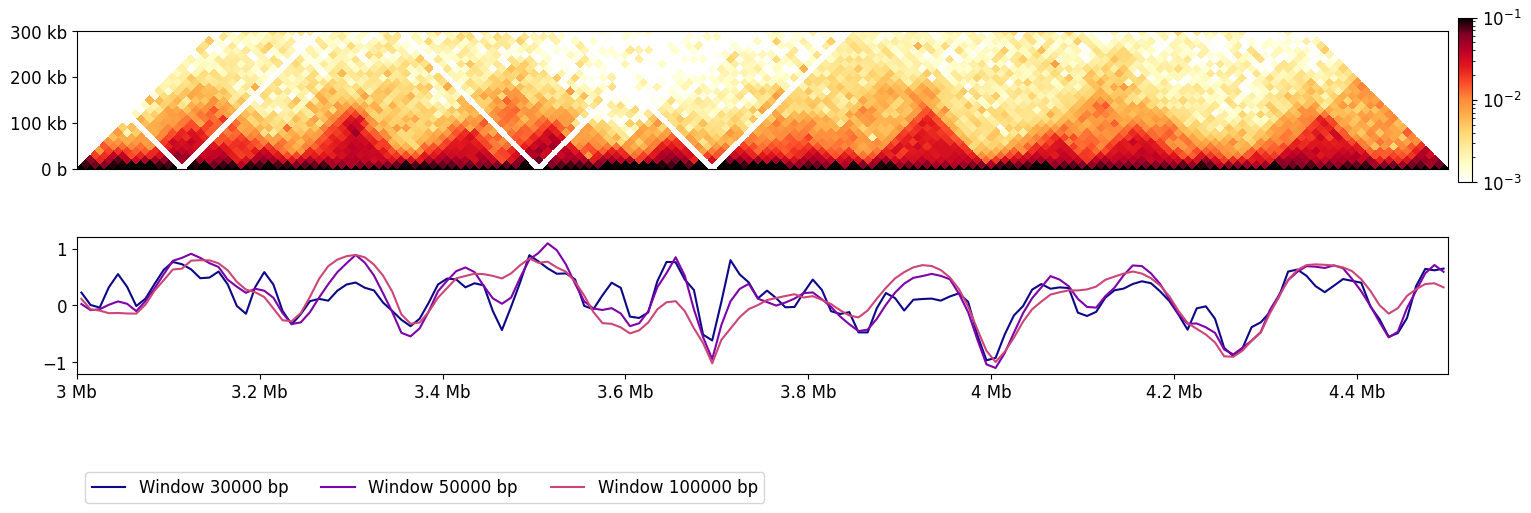

In [107]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

###Отражаем а графиках границы ТАДов для каждой реплики

(3000000.0, 4500000.0)

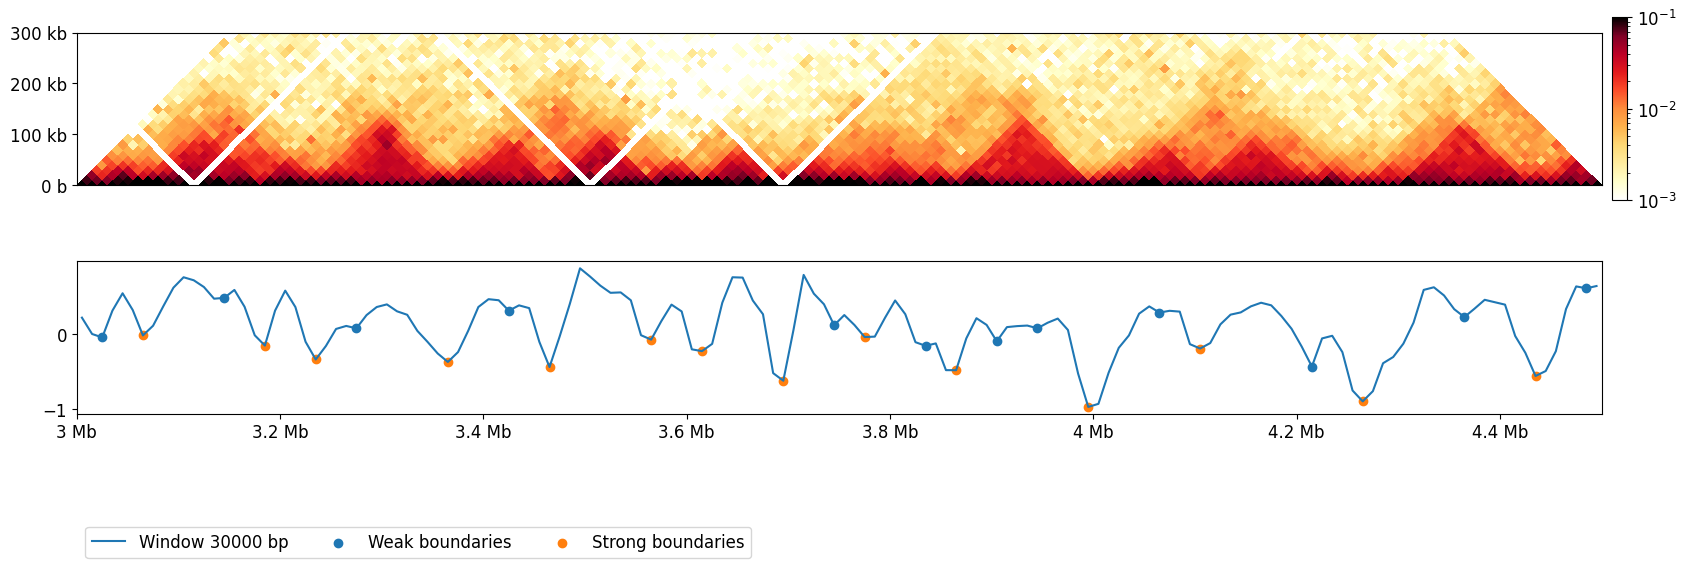

In [102]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(3000000.0, 4500000.0)

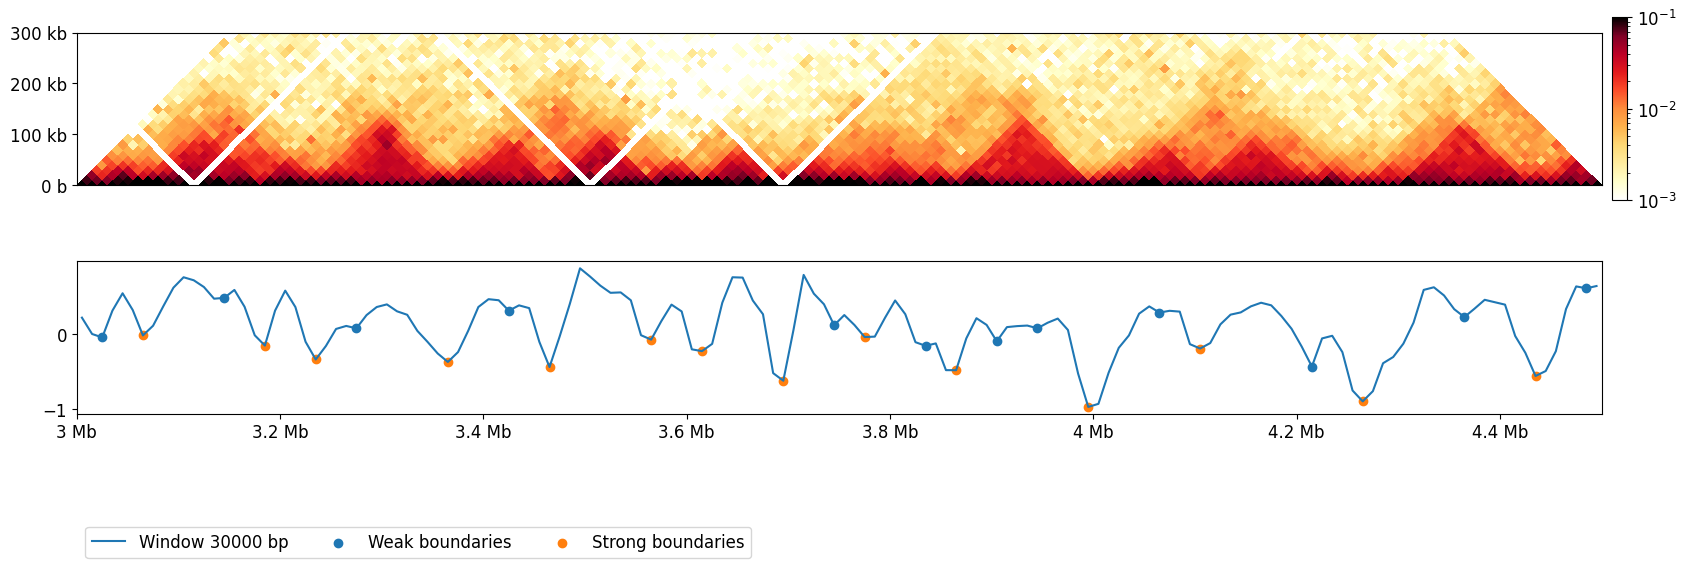

In [116]:
##HIC1
plt.rcParams['font.size'] = 12

region = ('chrX', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_1.matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(3000000.0, 4500000.0)

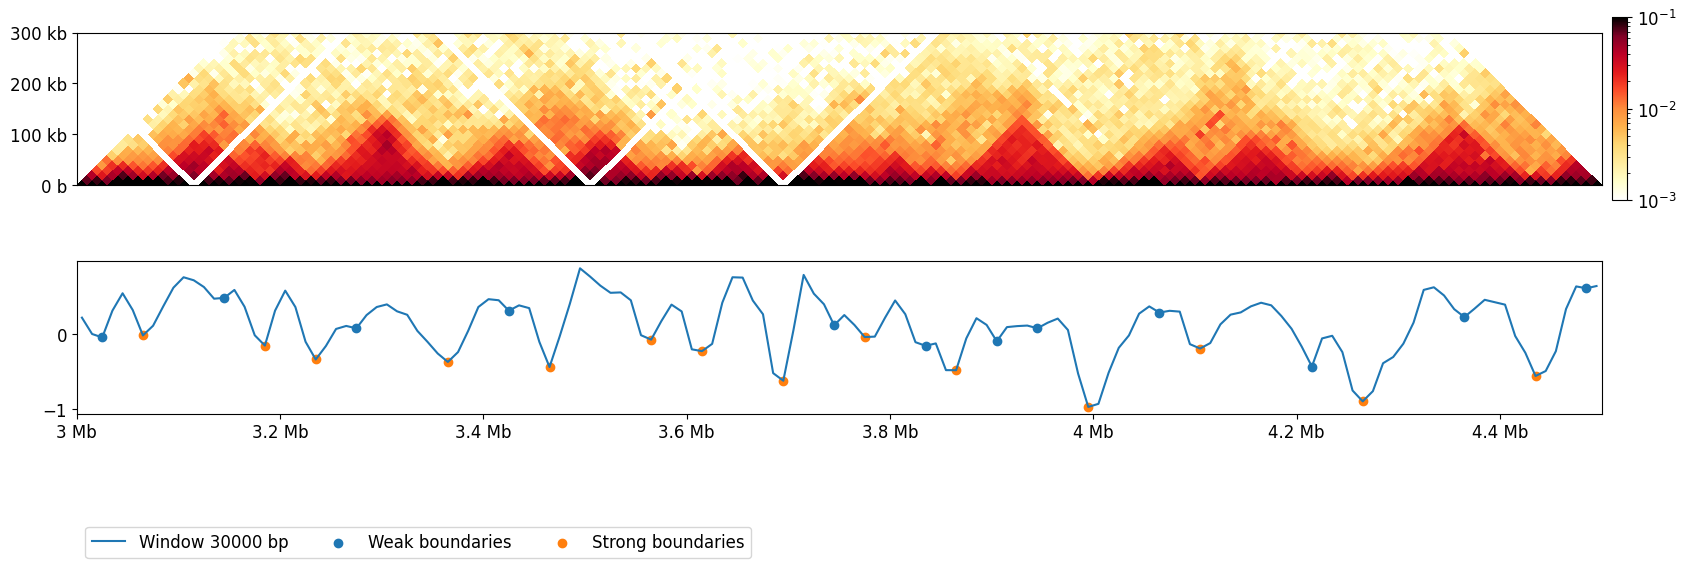

In [115]:
##HIC2
plt.rcParams['font.size'] = 12

region = ('chrX', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_2.matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(3000000.0, 4500000.0)

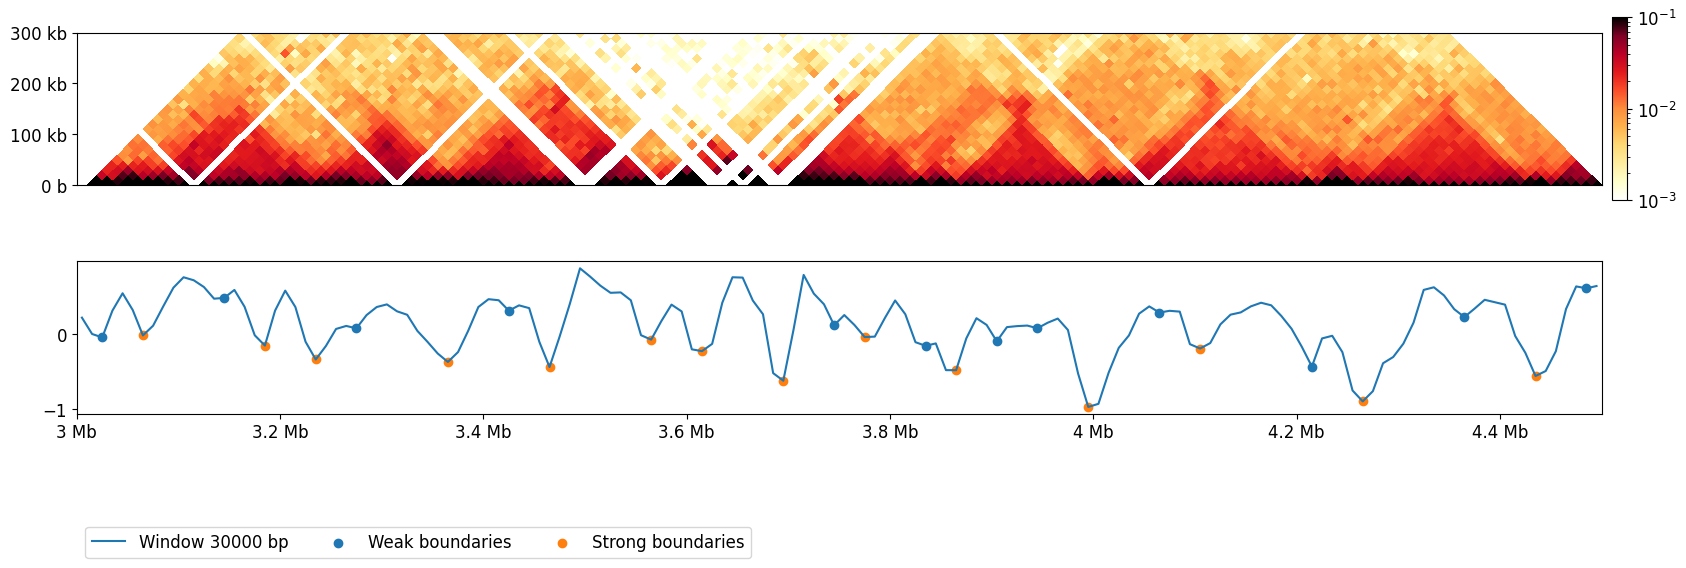

In [114]:
##HIC3
plt.rcParams['font.size'] = 12

region = ('chrX', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_3.matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(3000000.0, 4500000.0)

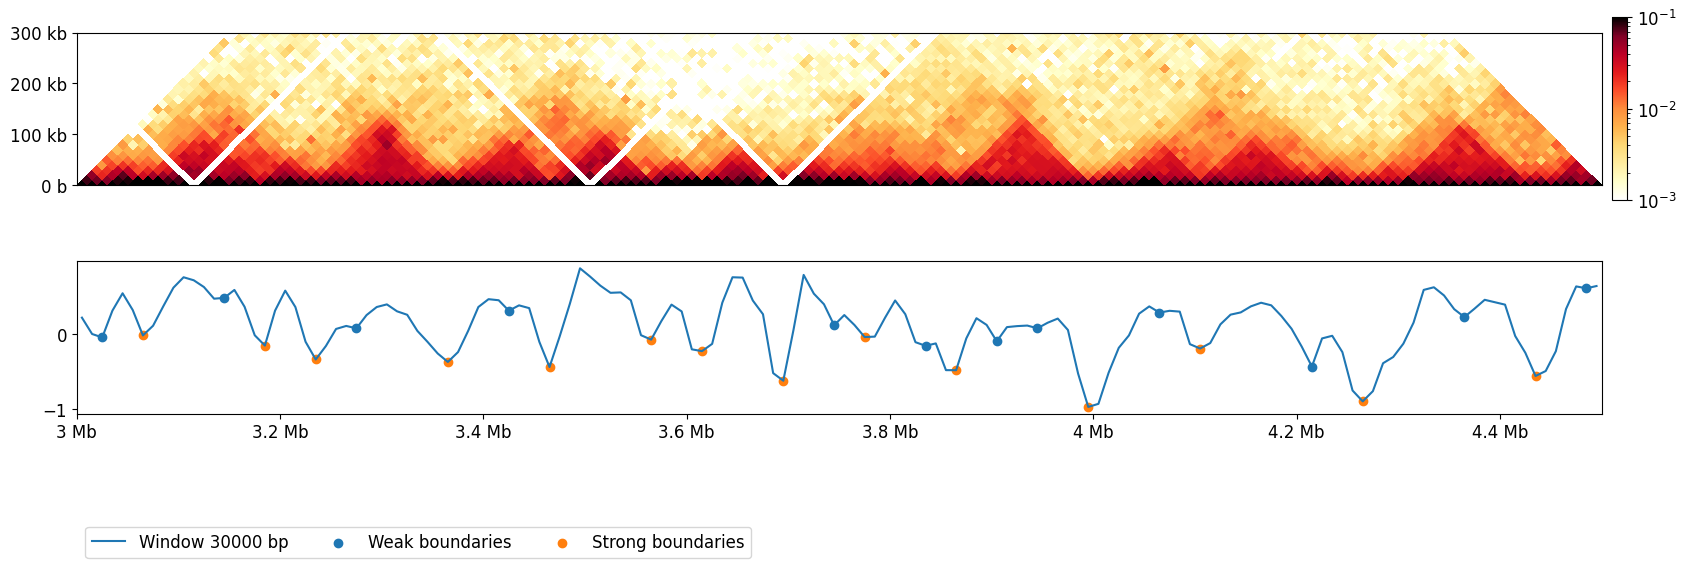

In [113]:
##HIC4
plt.rcParams['font.size'] = 12

region = ('chrX', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_4.matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

### Создаём bed файлы с границами ТАДов. Сила границы записана в поле **boundary_strength_30000**

In [117]:
for i in range(4):
  df = insulation_tables[i].loc[insulation_tables[i].is_boundary_30000 == True]
  df.to_csv(f"HIC{i}.bed", sep='\t', columns=['chrom', 'start', 'end', 'boundary_strength_30000'], index=False)

In [118]:
!ls *.bed

HIC0.bed  HIC1.bed  HIC2.bed  HIC3.bed


In [119]:
!cat HIC0.bed

chrom	start	end	boundary_strength_30000
chrX	3060000	3070000	0.5627576695259019
chrX	3180000	3190000	0.7335696907184502
chrX	3230000	3240000	0.7357490686601524
chrX	3360000	3370000	0.8381659812328673
chrX	3460000	3470000	1.1988873353906775
chrX	3560000	3570000	0.4675617476199399
chrX	3610000	3620000	0.9865743327944783
chrX	3690000	3700000	1.1630761108095937
chrX	3770000	3780000	0.48821130030679605
chrX	3860000	3870000	0.694154307086854
chrX	3990000	4000000	1.787176171173339
chrX	4100000	4110000	0.5625796113257645
chrX	4260000	4270000	1.3169781858287135
chrX	4430000	4440000	1.1848914086498914
